In [66]:
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

In [11]:
from data.code.track_1_kp_matching import load_kpm_data
from utils import get_data_path

In [12]:
gold_data_dir = Path(get_data_path(), 'kpm_data')

In [14]:
arg_df, kp_df, labels_df = load_kpm_data(gold_data_dir, subset="train")


ֿ** loading task data:
	(-1, 'Assisted suicide should be a criminal offence'): loaded 121 arguments and 4 key points
	(-1, 'Homeschooling should be banned'): loaded 129 arguments and 6 key points
	(-1, 'The vow of celibacy should be abandoned'): loaded 112 arguments and 6 key points
	(-1, 'We should abandon marriage'): loaded 111 arguments and 5 key points
	(-1, 'We should abolish capital punishment'): loaded 110 arguments and 5 key points
	(-1, 'We should abolish intellectual property rights'): loaded 123 arguments and 4 key points
	(-1, 'We should adopt atheism'): loaded 123 arguments and 3 key points
	(-1, 'We should adopt libertarianism'): loaded 113 arguments and 5 key points
	(-1, 'We should ban human cloning'): loaded 123 arguments and 5 key points
	(-1, 'We should ban private military companies'): loaded 106 arguments and 4 key points
	(-1, 'We should ban the use of child actors'): loaded 121 arguments and 5 key points
	(-1, 'We should close Guantanamo Bay detention camp'): lo

## Arguments training data

In [34]:
arg_df.sample(3)

,arg_id,argument,topic,stance
1818,arg_10_180,libertarianism maximizes personal freedom and ...,We should adopt libertarianism,1
2968,arg_16_131,mandatory retirement removes experienced perso...,We should end mandatory retirement,1
1061,arg_5_101,we should not abolish capital punishment becau...,We should abolish capital punishment,-1


In [35]:
arg_df.head(3)

,arg_id,argument,topic,stance
0,arg_0_0,`people reach their limit when it comes to the...,Assisted suicide should be a criminal offence,-1
1,arg_0_1,A patient should be able to decide when they h...,Assisted suicide should be a criminal offence,-1
2,arg_0_2,a person has the right to end their suffering ...,Assisted suicide should be a criminal offence,-1


In [45]:
arg_df.tail(3)

,arg_id,argument,topic,stance
5580,arg_27_220,While many who graduate from universities stru...,We should subsidize vocational education,1
5581,arg_27_221,with the rising cost of college tuition vocati...,We should subsidize vocational education,1
5582,arg_27_222,"yes, we should subsidize vocational education ...",We should subsidize vocational education,1


In [20]:
f"The number of topics: {len(set(arg_df.topic))}"

'The number of topics: 24'

In [39]:
f"The number of arguments: {len(set(arg_df.argument))}"

'The number of arguments: 5583'

In [23]:
f"Have duplicated argument: {len(set(arg_df.argument)) != len(arg_df)}"

'Have duplicated argument: False'

In [32]:
counter = Counter(arg_df['stance'])
counter

Counter({-1: 2700, 1: 2883})

In [ ]:
ratios = []
for topic in set(arg_df.topic):
    _stance = kp_df[kp_df.topic == topic].stance
    _counter = Counter(_stance)
    _counter_val = list(_counter.values())
    ratios.append(_counter_val[0]/_counter_val[1])

## Key points training data

In [36]:
kp_df.sample(3)

,key_point_id,key_point,topic,stance
131,kp_19_1,Citizens have a right not to vote,We should introduce compulsory voting,-1
199,kp_27_0,subsidizing vocational education leads to an i...,We should subsidize vocational education,-1
180,kp_24_8,Women in combat can be a distraction or harm t...,We should prohibit women in combat,1


In [43]:
f"arg_df and kp_df have the same number of topics: {len(set(kp_df.topic)) == len(set(arg_df.topic))}"

'arg_df and kp_df have the same number of topics: True'

In [46]:
f"Have duplicated key point: {len(set(kp_df.key_point)) != len(kp_df.key_point)}"

'Have duplicated key point: False'

In [48]:
counter = Counter(kp_df['stance'])
counter

Counter({-1: 99, 1: 108})

In [64]:
ratios = []
for topic in set(kp_df.topic):
    _stance = kp_df[kp_df.topic == topic].stance
    _counter = Counter(_stance)
    _counter_val = list(_counter.values())
    ratios.append(_counter_val[0]/_counter_val[1])

(array([3., 0., 2., 7., 0., 4., 0., 6., 1., 1.]),
 array([0.4 , 0.51, 0.62, 0.73, 0.84, 0.95, 1.06, 1.17, 1.28, 1.39, 1.5 ]),
 <BarContainer object of 10 artists>)

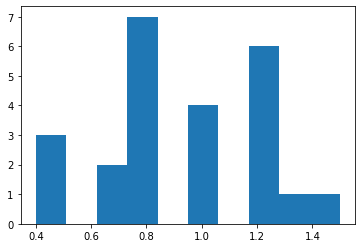

In [68]:
plt.hist(ratios)